# **Assignment 1 - Introduction to Machine Learning**

Name &emsp;&emsp;&emsp;: Matthew Alfredo <br/>
Student ID &emsp;: 202209134

## 1a. Linear Regression - Univariate

Simple linear regression using two columns in the given dataset House Rent. **Rent** will act as a dependent feature or the label and **Size** will act as an independent feature.

In [562]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [563]:
class LinearRegression:
    def __init__(self, learning_rate=0.00000005, iterations=100):
        self.cost_list = None
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros((2, 1))
        self.bias = 0
        self.cost_list = []

        # gradient descent
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [564]:
def mean_squared_error(y_real, y_predicted):
  return np.mean( (y_real - y_predicted) ** 2 )

In [565]:
data = np.loadtxt("House_Rent_Fixed_2_NoLabel.csv", delimiter=",")
data

array([[2.000e+00, 1.000e+00, 6.000e+01, 2.000e+03],
       [1.000e+00, 1.000e+00, 1.600e+02, 3.000e+03],
       [1.000e+00, 1.000e+00, 2.000e+02, 3.000e+03],
       ...,
       [4.000e+00, 4.000e+00, 4.800e+03, 1.300e+05],
       [4.000e+00, 4.000e+00, 4.341e+03, 1.300e+05],
       [4.000e+00, 6.000e+00, 3.500e+03, 1.300e+05]])

In [566]:
X = data[:, 2]
y = data[:, 3]

print(X)
print(y)

[  60.  160.  200. ... 4800. 4341. 3500.]
[  2000.   3000.   3000. ... 130000. 130000. 130000.]


In [567]:
features = X
label = y

In [568]:
X = np.vstack((np.ones((X.size, )), X)).T
X

array([[1.000e+00, 6.000e+01],
       [1.000e+00, 1.600e+02],
       [1.000e+00, 2.000e+02],
       ...,
       [1.000e+00, 4.800e+03],
       [1.000e+00, 4.341e+03],
       [1.000e+00, 3.500e+03]])

In [569]:
y = data[:, 3].reshape(y.size, 1)
y

array([[  2000.],
       [  3000.],
       [  3000.],
       ...,
       [130000.],
       [130000.],
       [130000.]])

In [570]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2164, 2) (2164, 1)
(542, 2) (542, 1)


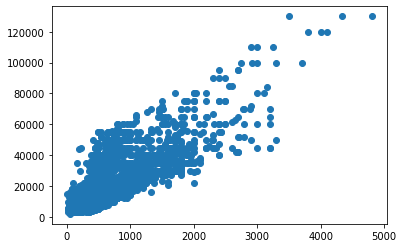

In [571]:
plt.scatter(X[:, 1], y)
plt.show()

In [588]:
linear_regression = LinearRegression(learning_rate=0.00000001, iterations=100000)

linear_regression.fit(X_train, y_train)

In [589]:
y_pred = linear_regression.predict(X_test)

In [590]:
mse = mean_squared_error(y_test, y_pred)
mse

144330842.57245815

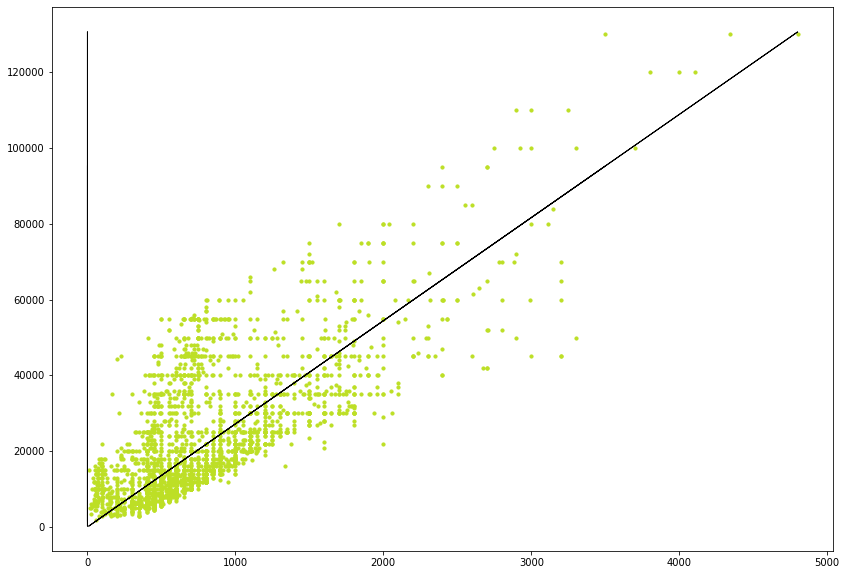

(2164, 2) (2164, 1)


In [591]:
y_pred_line = linear_regression.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(14, 10))
m1 = plt.scatter(features, label, color=cmap(0.9), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label="Prediction")
plt.show()
print(X_train.shape, y_train.shape)

In [593]:
# for comparison purpose
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_predicted = lr.predict(X_test)

mse2 = mean_squared_error(y_test, lr_predicted)
mse2

135575305.2544419

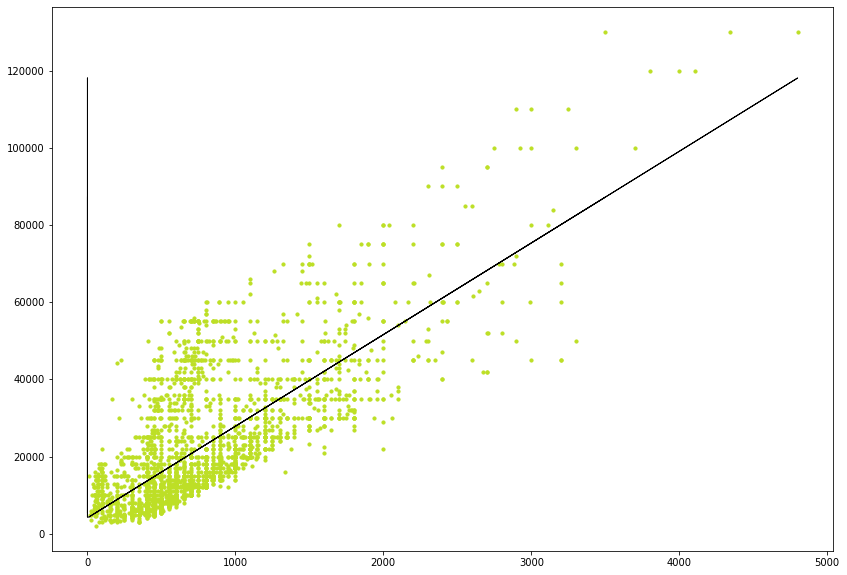

(2164, 2) (2164, 1)


In [594]:
y_pred_line = lr.predict(X)
cmap = plt.get_cmap('viridis')
fig2 = plt.figure(figsize=(14, 10))
m2 = plt.scatter(features, label, color=cmap(0.9), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label="Prediction")
plt.show()
print(X_train.shape, y_train.shape)



---



## 1b. Linear Regression - Multivariate

Simple linear regression using two columns in the given dataset about House Rent. **Rent** will act as a dependent feature or the label and **BHK, Size, Bathrooms** will act as independent features.



---



## 2. Logistic Regression

Classification of breast cancer using logistic regression. There will be 2 classes, Benign and Malignant.
